In [349]:
# Import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [350]:
# Read data
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

# Take a First Look at Data

In [351]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [352]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [353]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [354]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [355]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [356]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [357]:
# Check the data type of all columns
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [358]:
# Select the Numerical data column
listings_num = listings.select_dtypes(include=["int","float"])
listings_cat = listings.select_dtypes(include=["object"])

In [359]:
len(listings_num.columns)

30

In [360]:
len(listings_cat.columns)

62

In [361]:
listings_num.columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [362]:
listings_cat.columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_s

In [363]:
listings["cleaning_fee"].value_counts()

$50.00     310
$25.00     245
$60.00     185
$20.00     171
$100.00    170
          ... 
$240.00      1
$52.00       1
$275.00      1
$97.00       1
$185.00      1
Name: cleaning_fee, Length: 118, dtype: int64

In [364]:
calendar["available"].value_counts()

t    934542
f    459028
Name: available, dtype: int64

# Business Question

## From Airbnb host perspective, I'd like to know:
- Is the "price" fluctuating seasonly? monthly? weekly?  > so that I can adjust the price according to the market pattern. (both for customer)
- Which features might be the most significant that influence the review score? Can I predict the review score based on my listing features?
- Which features might influence the price the most?
- Is extra fee influence the review score? (extra fee: security_deposit, cleaning_fee, extra_people)
- what features are most related to super host?

## From Customer perspective, I'd like to know:
- If I decided to travel to Seattle, where is the cheapest area for me to have an accommodation?
- I'd like to know that where is the place has cheapest area and high review_score of transportation. > so that I can still easily travel to anywhere
- Is accommodates related to listing price? > then I can decide how many people I might go travel with

## General:
- how many Airbnb host set their price constant all the year?

# 1. Is the "price" fluctuating seasonly? monthly? weekly? 

1. Check the missing value, data type
> data cleaning for my need
2. Check whether different "listing_id" has different price 
> 1.so that I can confirm that how many host also set the fluctuate price    
> 2.know that whether setting fluctuate price is reasonable
3. Check the price fluctuating
> Yes, the mean price are fluctuate by month and week_day

In [365]:
# Check the missing value
calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [366]:
# Why there's missing value > since if available = false, there's no price 
calendar["available"].value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [367]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [368]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [369]:
# convert type of "price" into float type

# eliminate sign "$" and ",", then transform the format into float
calendar["price"] = calendar["price"].str.replace("$","").str.replace(",","").astype(float)

In [370]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [371]:
# convert type of "date" into date type
calendar["date"] = pd.to_datetime(calendar["date"])

In [372]:
calendar["date"].dt.year

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
1393565    2016
1393566    2016
1393567    2016
1393568    2017
1393569    2017
Name: date, Length: 1393570, dtype: int64

In [373]:
# Split "date" column into different columns
calendar = calendar.assign(
    
    year = lambda df:df.date.dt.year,
    month = lambda df:df.date.dt.month,
    day = lambda df:df.date.dt.day,
    day_of_week = lambda df:df.date.dt.weekday,
    day_name = lambda df:df.date.dt.day_name()
    
)

In [374]:
calendar

,listing_id,date,available,price,year,month,day,day_of_week,day_name
0,241032,2016-01-04,t,85.0,2016,1,4,0,Monday
1,241032,2016-01-05,t,85.0,2016,1,5,1,Tuesday
2,241032,2016-01-06,f,NaN,2016,1,6,2,Wednesday
3,241032,2016-01-07,f,NaN,2016,1,7,3,Thursday
4,241032,2016-01-08,f,NaN,2016,1,8,4,Friday
...,...,...,...,...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,2016,12,29,3,Thursday
1393566,10208623,2016-12-30,f,NaN,2016,12,30,4,Friday
1393567,10208623,2016-12-31,f,NaN,2016,12,31,5,Saturday
1393568,10208623,2017-01-01,f,NaN,2017,1,1,6,Sunday


In [375]:
# Set day_name order
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
calendar["day_name"]= pd.Categorical(calendar["day_name"], categories=cats, ordered=True)

In [376]:
# Check how many host set the price to be fluctuate

# https://stackoverflow.com/questions/41415017/count-unique-values-using-pandas-groupby
# print(calendar.groupby("listing_id")["price"].value_counts())

# print how many unique price each "listing_id" has
print(calendar.groupby("listing_id")["price"].nunique())

listing_id
3335         1
4291         1
5682        10
6606         2
7369         1
            ..
10332096     1
10334184     1
10339144     0
10339145     3
10340165     1
Name: price, Length: 3818, dtype: int64


In [377]:
# print different unique price how many host has
print(calendar.groupby("listing_id")["price"].nunique().value_counts())

1      1608
2       802
3       268
4       138
5       130
       ... 
104       1
92        1
84        1
76        1
158       1
Name: price, Length: 109, dtype: int64


In [378]:
# reset_index(): https://thispointer.com/pandas-convert-dataframe-index-into-column-using-dataframe-reset_index-in-python/
count_diff_price = calendar.groupby("listing_id")["price"].nunique().value_counts().to_frame().reset_index()

In [379]:
# rename the column name
count_diff_price.rename(columns={"index":"unique_price_count","price":"host_count"},inplace=True)

In [380]:
# add new column count the perentage of host_count
count_diff_price["host_count_percentage"] = count_diff_price["host_count"]/count_diff_price["host_count"].sum()

In [381]:
count_diff_price

,unique_price_count,host_count,host_count_percentage
0,1,1608,0.421163
1,2,802,0.210058
2,3,268,0.070194
3,4,138,0.036145
4,5,130,0.034049
...,...,...,...
104,104,1,0.000262
105,92,1,0.000262
106,84,1,0.000262
107,76,1,0.000262


In [382]:
count_diff_price.sort_values(by="host_count_percentage", ascending=False).head(10)

,unique_price_count,host_count,host_count_percentage
0,1,1608,0.421163
1,2,802,0.210058
2,3,268,0.070194
3,4,138,0.036145
4,5,130,0.034049
5,0,95,0.024882
6,7,61,0.015977
7,6,52,0.013620
8,10,49,0.012834
9,8,46,0.012048


**Summary**
- 42% hosts have only one price during a year
- 58% hosts have more than one price
- Comapre to other hosts, whether I have different price or not during a year is reasonable
- Almost half-half between having one price and more than one price

In [383]:
# Check whether price fluctuating?

# Check year
calendar["year"].value_counts()

2016    1385934
2017       7636
Name: year, dtype: int64

In [384]:
# Check availabe
calendar["available"].value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [385]:
# Select "available"="t" and year=2016
calendar_available = calendar[calendar["available"]=="t"] 

In [386]:
calendar_available = calendar_available[calendar_available["year"]==2016]

In [387]:
calendar_available

,listing_id,date,available,price,year,month,day,day_of_week,day_name
0,241032,2016-01-04,t,85.0,2016,1,4,0,Monday
1,241032,2016-01-05,t,85.0,2016,1,5,1,Tuesday
9,241032,2016-01-13,t,85.0,2016,1,13,2,Wednesday
10,241032,2016-01-14,t,85.0,2016,1,14,3,Thursday
14,241032,2016-01-18,t,85.0,2016,1,18,0,Monday
...,...,...,...,...,...,...,...,...,...
1393207,10208623,2016-01-06,t,87.0,2016,1,6,2,Wednesday
1393208,10208623,2016-01-07,t,87.0,2016,1,7,3,Thursday
1393211,10208623,2016-01-10,t,87.0,2016,1,10,6,Sunday
1393212,10208623,2016-01-11,t,87.0,2016,1,11,0,Monday


In [388]:
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
calendar_date = calendar_available.groupby("date").agg({"price":["mean","min","max"]}).reset_index()

In [389]:
# Remove Multicolumns
calendar_date.columns = calendar_date.columns.droplevel(0)

In [390]:
# Rename the columns name
calendar_date.rename(columns={"":"date","mean":"mean_price","min":"min_price","max":"max_price"},inplace=True)

In [391]:
calendar_date

,date,mean_price,min_price,max_price
0,2016-01-04,122.085879,25.0,975.0
1,2016-01-05,120.681307,25.0,950.0
2,2016-01-06,120.928258,25.0,950.0
3,2016-01-07,120.958896,22.0,950.0
4,2016-01-08,127.640853,20.0,950.0
...,...,...,...,...
358,2016-12-27,137.204168,20.0,1650.0
359,2016-12-28,137.177197,20.0,1650.0
360,2016-12-29,138.045503,20.0,1650.0
361,2016-12-30,144.738380,20.0,1650.0


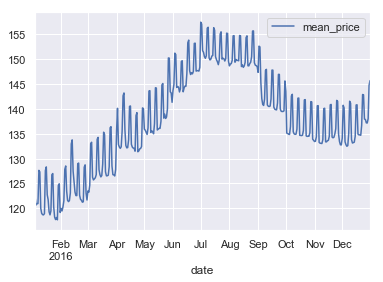

In [392]:
# We can see there are specific mean price fluctuate among different month 
calendar_date.plot(x="date",y="mean_price")
#calendar_date.plot(x="date",y="min_price")
#calendar_date.plot(x="date",y="min_price")

In [393]:
calendar_month = calendar_available.groupby("month").agg({"price":["mean","min","max"]}).reset_index()
calendar_month.columns = calendar_month.columns.droplevel(0)
calendar_month.rename(columns={"":"month","mean":"mean_price","min":"min_price","max":"max_price"},inplace=True)

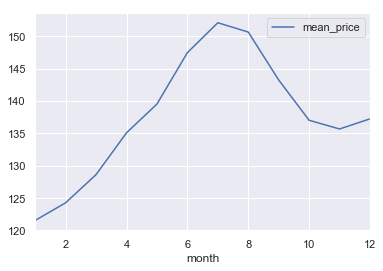

In [394]:
calendar_month.plot(x="month",y="mean_price")

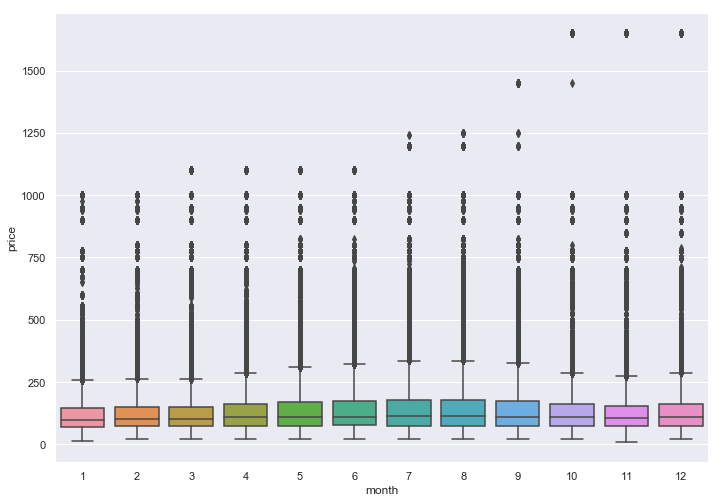

In [395]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=calendar_available, x="month", y="price")

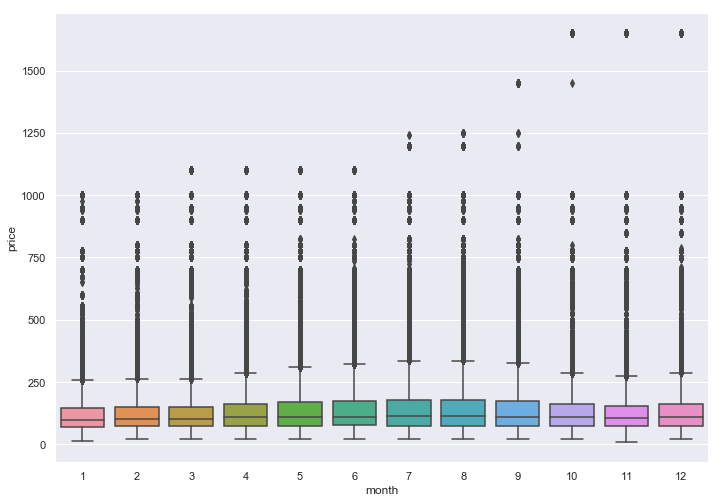

In [396]:
# We can check the boxplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=calendar_available, x="month", y="price")

In [397]:
calendar_dayname = calendar_available.groupby("day_name").agg({"price":["mean","min","max"]}).reset_index()
calendar_dayname.columns = calendar_dayname.columns.droplevel(0)
calendar_dayname.rename(columns={"":"month","mean":"mean_price","min":"min_price","max":"max_price"},inplace=True)

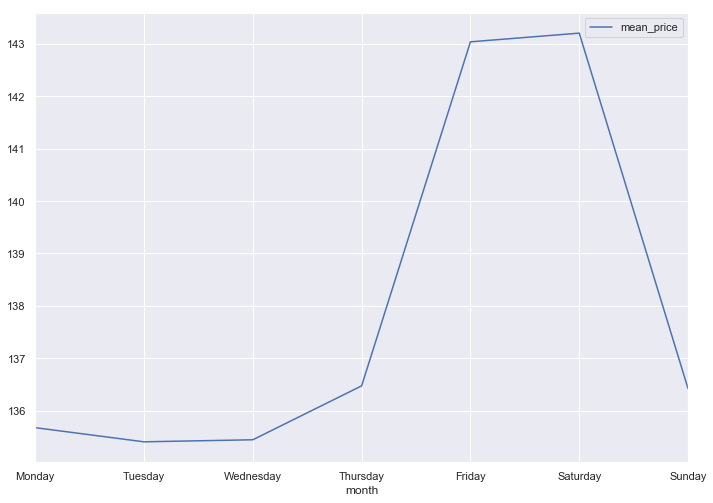

In [398]:
calendar_dayname.plot(x="month",y="mean_price")

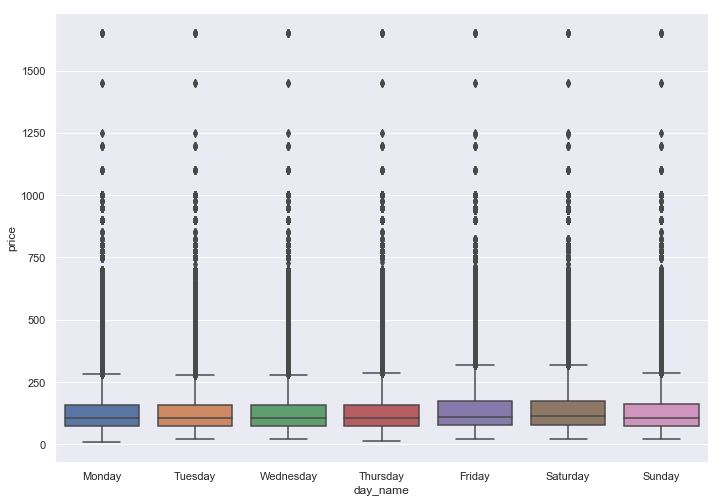

In [399]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=calendar_available, x="day_name", y="price")

**Summary**
- mean price are fluctuate by month and week_day
- July and Augest have the highest mean pirce
- Firday and Saturaday have the highest mean price